В этом занятии:

* Реализуем простейший двумерный градиентный спуск

* Научимся работать с автоматическим диффиренцированием из _PyTorch_

* Будем оптимизировать различные многомерные функции

* Научимся использовать модификации градиентного спуска для оптимизации проивольных функций с помощью _TensorFlow_

___

In [ ]:
!pip install numpy sympy matplotlib torch tensorflow

In [ ]:
import numpy as np
import sympy as sp

# Двумерный градиентный спуск

Рассмотрим в качестве примера оптимизации функцию $F_{2d},$ представляющую из себя композицию тригонометрических функций
$$ F_{2d}(x_1,x_2) = \cos(x_1)^2 + \cos(x_2)^2 + \cos(x_1) + \sin(x_2).$$

Уже по внешнему виду функции становится ясно, что найти ее наименьшее значение  аналитически не так просто. Воспользуемся градиентным спуском.

Программная реализация функции:

In [ ]:
def F_2d(x1, x2):
  return np.cos(x1)**2 + np.cos(x2)**2 + np.cos(x1) + np.sin(x2)

Для осуществления градиентного спуска нужно знать направление градиента. Найдем частные производные функции $F_{2d}$ с помощью символьных вычислений (модуль из библиотеки _sympy_).

In [ ]:
from sympy import symbols, cos, sin, diff

x1, x2 = symbols('x1 x2')
function = sp.cos(x1)**2 + sp.cos(x2)**2 + sp.cos(x1) + sp.sin(x2)
params = x1, x2
for param in params:
  print(f'Частная производная по {param}:', function .diff(param) )

Частная производная по x1: -2*sin(x1)*cos(x1) - sin(x1)
Частная производная по x2: -2*sin(x2)*cos(x2) + cos(x2)


Будем использовать пользовательский класс для удобного отслеживания работы алгоритмов. При инициализации объекта класса нужно будет указать размер пространства параметров

In [1]:
class Steps:
  def __init__(self, size_point):
    self.size_point = size_point
    self.points = np.array([])
    self.targets = np.array([])

  def add_step(self, point, target):
    self.points = np.append(self.points, point).reshape(-1, self.size_point)
    self.targets = np.append(self.targets, target)

  def history(self):
    return [ {'point': self.points[index], 'target': self.targets[index]}
            for index in range(0, len(self.targets)) ]


Функция _grad_descent2D_ является реализацией двумерного градиентного спуска. Параметр _alpha_ называют коэфициентом скорости обучения или скоростью обучения(learning rate). Из лекций мы знаем, что смысл данного параметра заключается в том, что он позволяет регулировать размер шага на каждой итерации.

In [ ]:
def grad_descent2D(alpha, epoch=100, start_x1=0.1, start_x2=-0.1):
  # Инициализируем шаги
  steps = Steps(2)

  for i in range(epoch):
    steps.add_step(np.array([start_x1, start_x2]), F_2d(start_x1, start_x2))

    # Вычисляем значение градиента покоординатно
    grad_x1 =  -2 * np.sin(start_x1) * np.cos(start_x1) - np.sin(start_x1)
    grad_x2 =  -2 * np.sin(start_x2) * np.cos(start_x2) + np.cos(start_x2)

    start_x1 -= alpha * grad_x1
    start_x2 -= alpha * grad_x2

  return steps


Запускаем алгоритм

In [ ]:
steps_2d  = grad_descent2D(0.2, 30)

In [ ]:
steps_2d.targets[::2]

array([ 2.87523733,  1.92830123,  0.58325881, -0.6321156 , -1.1635785 ,
       -1.23609417, -1.24724006, -1.2493944 , -1.24986075, -1.24996726,
       -1.24999222, -1.24999814, -1.24999955, -1.24999989, -1.24999997])

Отрисуем результаты

In [ ]:
def paint2D(steps, F, h=100, width=1200, height=600, degrees=50):
  """
  Функция отрисовки поверхности и траектории градиентного спуска
  """
  from matplotlib import pyplot as plt
  plt.style.use('fivethirtyeight')

  x1 = np.linspace(-5,5,h)
  x2 = np.linspace(-5,5,h)
  x1, x2 = np.meshgrid(x1, x2)

  fig = plt.figure(figsize=(16, 9))
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(x1, x2, F(x1, x2), cmap='coolwarm' )

  fig.colorbar(surf, shrink=0.5)
  ax.view_init(elev=degrees)
  ax.plot(steps.points[:,0], steps.points[:,1], steps.targets,
      color='black', markerfacecolor='y', markersize=12, marker='o')
  plt.show()


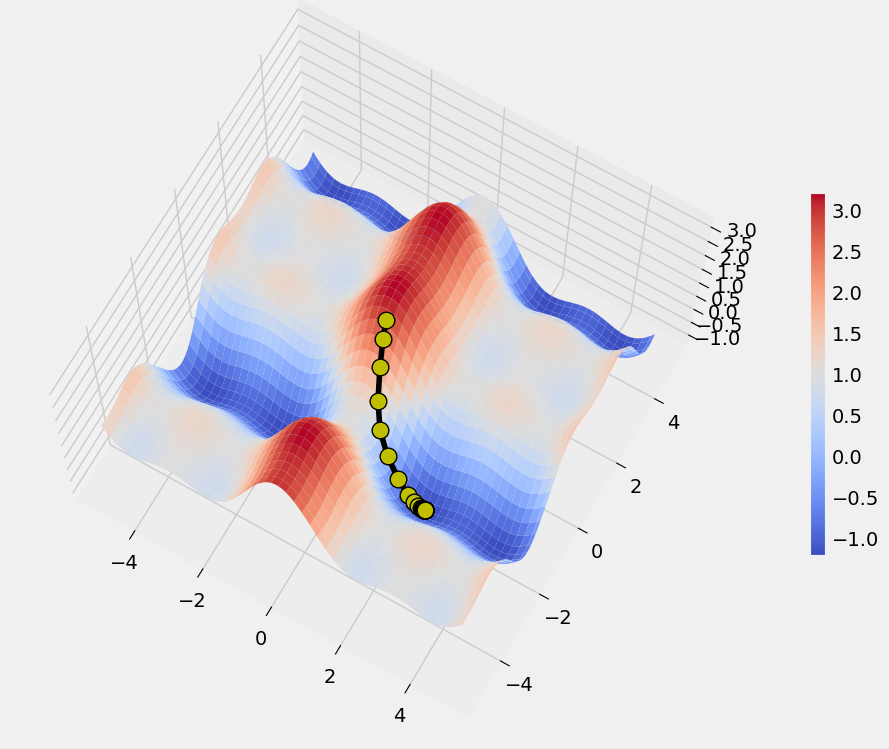

In [ ]:
paint2D(steps_2d, F_2d, degrees=70)

### **[Задание 1]**

Если запустить двумерный градиентный спуск из начальной точки $x=(10;8)$  для функции $F_{2d}$ со значением learning rate $0.001,$ то в какой точке он окажется через $18$ итераций?

In [ ]:
# Решение

# Многомерный градиентный спуск

Представим, что нужно найти минимум функции не от двух переменных, а от $n.$ Дана функция

$$ F_n(X) = \sum\limits_{i=1}^n f_i(x_i) = \sum\limits_{i=1}^n \cos(x_i)^2 + 2\sin(x_i),$$


где $X^T = (x_1, ..., x_n)$.

Минимум функции $F_n(X)$ можно найти по формуле $$\min F_n(X) = -2n.$$

Чтобы убедиться этом, отрисуем график функции для случая $n=1.$

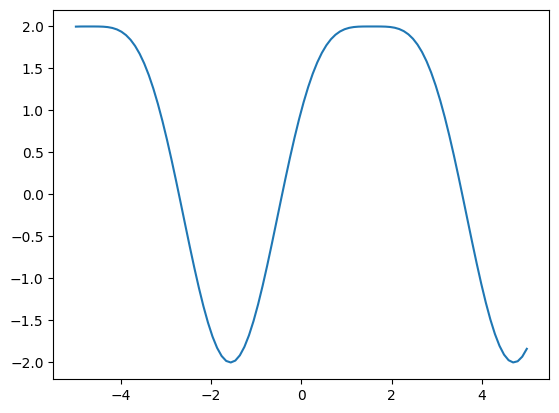

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
  return np.cos(x)**2 + 2 * np.sin(x)

x = np.linspace(-5, 5, 100)

plt.plot(x, f(x), linestyle='solid')
plt.show()

В дальнейшем, будем предполагать, что $ n=8,$ тогда минимум функции $-16.$

Импортируем библиотеку `torch` и создадим вектор начального приближения $X.$ Обьект `tensor` является некоторой "оберткой" _numpy-массива_, за исключением нескольких особенностей.

In [ ]:
import torch

np.random.seed(40)
start_position = np.random.uniform(-10, 10, [8, 1])
print(start_position)

# Для создания обьекта tensor достаточно на вход подать numpy-массив.
# Параметр requires_grad отвечает за возможность использования
# автоматического дифференцирования
X = torch.tensor(start_position, requires_grad=True)

[[-1.84625944]
 [-8.8926792 ]
 [ 5.77069755]
 [-4.2538963 ]
 [-0.99298826]
 [-3.92175389]
 [ 0.52799049]
 [ 2.47624426]]


Вычислим значение минимума функции $F_n(X)$

In [ ]:
F_min = -2 * X.shape[0]
F_min

-16

Объявим функции $F_n(X)$ с использованием методов из библиотеки `torch` (это нужно для того, чтобы не считать градиент вручную).

In [ ]:
def F_n(X):
  return (torch.cos(X)**2 + 2*torch.sin(X)).sum()

Функция многомерного градиентного спуска:

In [ ]:
def gradientND(X, epoch=100, alpha=0.05):

  steps = Steps(X.shape[0])
  # Создание объекта x на основе X для запуска итерационного процесса без изменения X.
  x = X.clone().detach().requires_grad_()
  for i in range(epoch):
    steps.add_step(x.detach().numpy(), float(F_n(x)))
    # Вычисление частных производных функции F(x).
    F_n(x).backward()
    # Результат частных производных записывается в x.grad.
    x.data -= alpha * x.grad
    # По умолчанию градиенты накапливаются, метод grad.zero_() обнуляет градиент.
    x.grad.zero_()
  return steps

Запустим градиентный спуск

In [ ]:
steps_ND = gradientND(X, 50, 0.1)
steps_ND.targets

array([  3.78787167,   1.88878118,   0.4228756 ,  -0.58469083,
        -1.34010604,  -2.09846674,  -3.03836678,  -4.22918236,
        -5.61178609,  -7.04532011,  -8.40412288,  -9.60312973,
       -10.58628849, -11.29861856, -11.72044379, -11.9246986 ,
       -12.01418371, -12.05612283, -12.08203284, -12.10527814,
       -12.13219178, -12.16714734, -12.21493056, -12.28231269,
       -12.3797417 , -12.52358755, -12.73873581, -13.05929811,
       -13.51986115, -14.12324536, -14.78830001, -15.35467811,
       -15.71197472, -15.88566461, -15.95719587, -15.98436215,
       -15.99433999, -15.99795842, -15.99926452, -15.99973516,
       -15.99990465, -15.99996567, -15.99998764, -15.99999555,
       -15.9999984 , -15.99999942, -15.99999979, -15.99999993,
       -15.99999997, -15.99999999])

Произведем нормировку

In [ ]:
steps_ND_norm = (steps_ND.targets.reshape(1,-1) / F_min)[0]
steps_ND_norm

array([-0.23674198, -0.11804882, -0.02642972,  0.03654318,  0.08375663,
        0.13115417,  0.18989792,  0.2643239 ,  0.35073663,  0.44033251,
        0.52525768,  0.60019561,  0.66164303,  0.70616366,  0.73252774,
        0.74529366,  0.75088648,  0.75350768,  0.75512705,  0.75657988,
        0.75826199,  0.76044671,  0.76343316,  0.76764454,  0.77373386,
        0.78272422,  0.79617099,  0.81620613,  0.84499132,  0.88270283,
        0.92426875,  0.95966738,  0.98199842,  0.99285404,  0.99732474,
        0.99902263,  0.99964625,  0.9998724 ,  0.99995403,  0.99998345,
        0.99999404,  0.99999785,  0.99999923,  0.99999972,  0.9999999 ,
        0.99999996,  0.99999999,  1.        ,  1.        ,  1.        ])

Отрисуем процесс минимизации функции $F(X)$

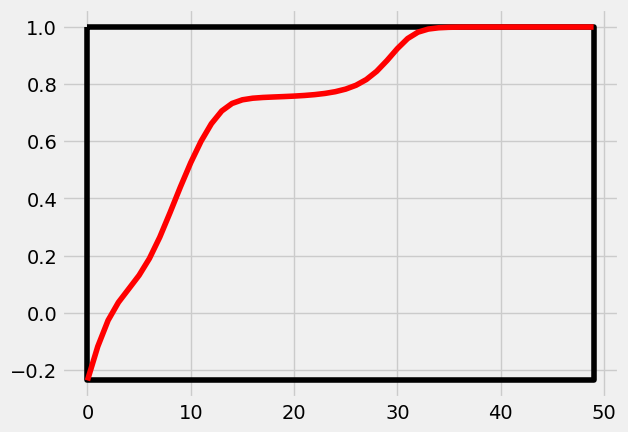

In [ ]:
def graph2D(y, col='red'):
    """
    Отрисовка двумерного графика
    """

    x = [i for i in range(0,len(y))]

    plt.plot([0,len(y)-1,len(y)-1,0,0], [1,1,np.min(y),np.min(y),1],color='black')
    plt.plot(x, y, color=col, linestyle='solid')
    plt.show()

graph2D(steps_ND_norm)

### **[Задание 2]**

Напишите функцию `gradientNDG`, у которой будут такие же входные параметры, что и у функции `gradientND`. Ваша функция должна будет оптимизировать функцию $$G(X) = \sum\limits_{i=1}^3x_i^2 + \cos{x_i}$$

Запустите функцию из начальной точки $(1.1, 2.2, 3.3)$, при скорости обучения $0.1$ и $20$ эпохах.

In [ ]:
# Решение

# Модификации и разновидности

Существует довольно много различных модификаций многомерного градиентного спуска: _Momentum_, _Nesterov_, _RMSprop_ и т.д. Но самая популярная – _Adam_.

Познакомимся с ней подробнее. На этот раз мы не будем реализовывать _Adam_ с нуля, а воспользуемся уже реализованным функционалом из библиотеки `TensorFlow`.

Реализуем функцию $F_n$, используя встроенные функции из `TensorFlow`. Мы будем поступать таким образом потому, что функции из `TensorFlow` поддерживают автоматическое вычисление градиента, также как и в `PyTorch`.

In [ ]:
import tensorflow as tf

def F_ad(x):
    return tf.reduce_sum(tf.math.cos(x)**2 + 2*tf.math.sin(x))

In [ ]:
def gradient_adam(X, epoch=100, alpha=0.05):
    # Установим для алгоритма оптимизации значение learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=alpha)
    x = tf.Variable(X)
    steps = Steps(X.shape[0])

    for i in range(epoch):
        # Вычисляем значение градиента функции
        with tf.GradientTape() as tape:
            y = F_ad(x)
            gradient = tape.gradient(y, x)
        # совершаем оптимизацию, согласно выбранному алгоритму, изменяя значение x
        optimizer.apply_gradients([(gradient, x)])
        steps.add_step(x.numpy(), F_ad(x) )
    return steps

Создадим начальное приближение $X,$ конвертировав _numpy-массив_ в тензор  из библиотеки `TensorFlow` и запустим алгоритм.

In [ ]:
X = tf.convert_to_tensor(start_position)

Приступим к изучению _Adam_ на основе функционала из библиотеки `TensorFlow`. Стоит обратить внимание, что _Adam_ имеет больше начальных параметров, но сейчас зададим только learning rate, а все остальные параметры оставим инициализированными стандартными начальными значениями. [Подробности ](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

In [ ]:
steps_adam = gradient_adam(X, 50, 0.1)
steps_adam.targets

array([  2.76700482,   1.76190451,   0.77841982,  -0.18722541,
        -1.14751241,  -2.11323617,  -3.08775932,  -4.0705507 ,
        -5.06051933,  -6.05640596,  -7.0562843 ,  -8.05721344,
        -9.05456829, -10.04057039, -11.00259035, -11.92251093,
       -12.77796228, -13.54519453, -14.20274431, -14.73498828,
       -15.13480882, -15.404793  , -15.55671819, -15.6095548 ,
       -15.58664095, -15.51279167, -15.41186569, -15.30497321,
       -15.20930956, -15.13755049, -15.09772623, -15.09345236,
       -15.12438884, -15.18684852, -15.27453488, -15.37940068,
       -15.49258684, -15.60536109, -15.70995485, -15.80020521,
       -15.87194559, -15.92314167, -15.9538125 , -15.96579139,
       -15.96236968, -15.94784919, -15.92702532, -15.90463525,
       -15.88482869, -15.87073493])

Визуализировать восьмимерное пространство и траекторию алгоритма оптимизации довольно трудно. Поэтому будем отрисовать линейно нормализованный график изменения значения функции в зависимости от эпохи.

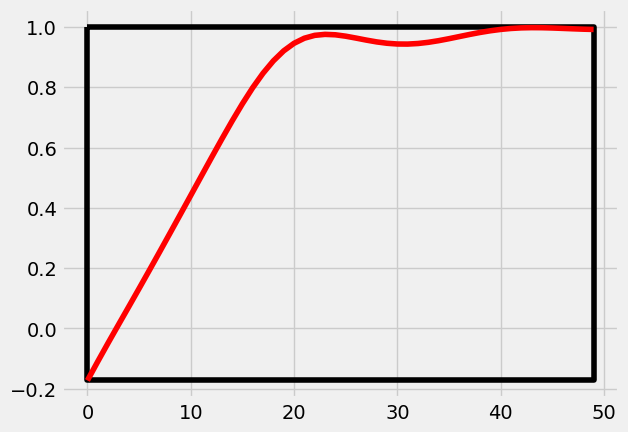

In [ ]:
steps_adam_norm = (steps_adam.targets.reshape(1,-1) / F_min)[0]
graph2D(steps_adam_norm)

Как можно заметить, траектория _Adam_ более гладкая, чем у многомерного градиентного спуска.

### [Задание 3]

Реализуйте функцию Райстинга $$F_{rasting}(X) = 10n + \sum\limits_{i=1}^n (x_i^2 - 10\cos{2\pi x_i}),$$
где $X = (x_1,…,x_n)$  предполагая, что $n=12.$

Произведите оптимизацию функции $F_{rasting}(X)$ используя алгоритм [_Adagrad_](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adagrad) со значениями параметров __learning_rate=0.1__ и __initial_accumulator_value=0.5__, при 100 эпохах.

В качестве начального приближения стоит использовать случайно сгенерированную точку из равномерного распределения на отрезке $[-5;5],$ при __np.random.seed(13)__.

Найдите координаты итоговой точки.

In [ ]:
# Решение

# Полезные материалы

* [Автоматическое дифференцирование _PyTorch_](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html)
* [Алгоритмы оптимизации _TensorFlow_ ](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)